I will be testing how to construct a Vandermonde matrix for a Fourier transformation of a given signal.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


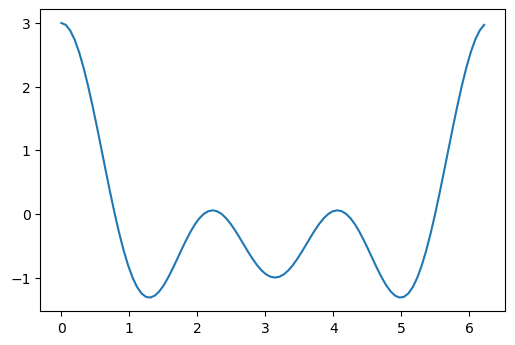

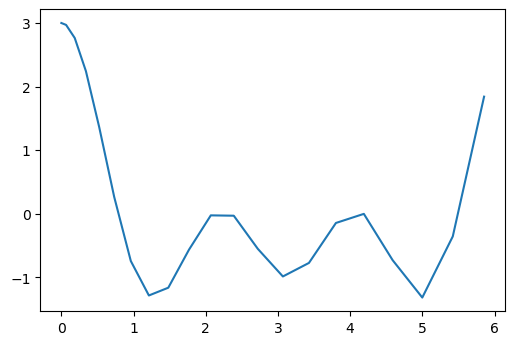

In [4]:
# construct equispaced and nonequispaced signals

def sig_gen(x):
    return np.cos(x) + np.cos(2*x) + np.cos(3*x)

x_eq = np.arange(96) * 2 * np.pi / 96
x_non = np.arange(21)**1.5 * 2 * np.pi / 96

y_eq = sig_gen(x_eq)
y_non = sig_gen(x_non)

plt.figure(dpi=100)
plt.scatter(x_eq, y_eq)

plt.figure(dpi=100)
plt.scatter(x_non, y_non)